In [1]:
import pandas as pd
from src.modelado import categorizar_horas
from src.modelado import dividir_variables
from src.modelado import dividir_datos
from src.modelado import pipeline_preprocesamiento
from src.modelado import entrenar_modelo
from src.modelado import calcular_matriz_confusion
from src.modelado import graficar_matriz_confusion
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("../data/tattoo_studio_clean.csv")

In [3]:
df["Session_Hours_Cat"] = df["Session_Hours"].apply(categorizar_horas)

In [4]:
y = df["Session_Hours_Cat"]
X = df.drop(columns=["Session_Hours", "Session_Hours_Cat"])

In [5]:
X_train, X_test, y_train, y_test = dividir_datos(X, y)

In [6]:
preprocesamiento = pipeline_preprocesamiento(X)

In [7]:
modelo = entrenar_modelo(preprocesamiento, X_train, y_train)

In [8]:
y_pred = modelo.predict(X_test)
cm = calcular_matriz_confusion(y_test, y_pred)
cm

array([[230,  17,   0],
       [ 37,  78,   6],
       [  0,   1,  31]])

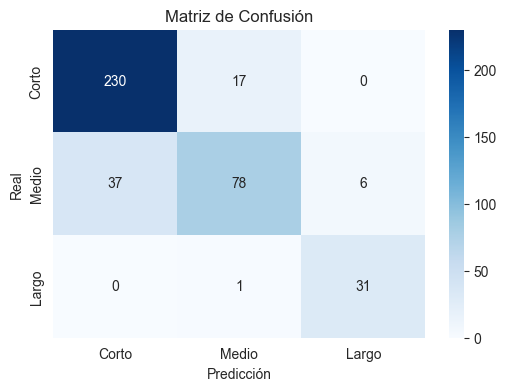

In [9]:
graficar_matriz_confusion(cm)


In [10]:
horas_reales = df.loc[X_test.index, "Session_Hours"]

In [11]:
rango_categorias = {
    "Corto": "0–3 horas",
    "Medio": "3–6 horas",
    "Largo": "6+ horas"
}
comparacion = pd.DataFrame({
    "Horas_Reales": horas_reales.values,
    "Predicción_Categoría": y_pred
})
comparacion["Rango_Predicción"] = comparacion["Predicción_Categoría"].map(rango_categorias)
comparacion.head()

,Horas_Reales,Predicción_Categoría,Rango_Predicción
0,1,Corto,0–3 horas
1,3,Corto,0–3 horas
2,3,Corto,0–3 horas
3,2,Corto,0–3 horas
4,2,Corto,0–3 horas


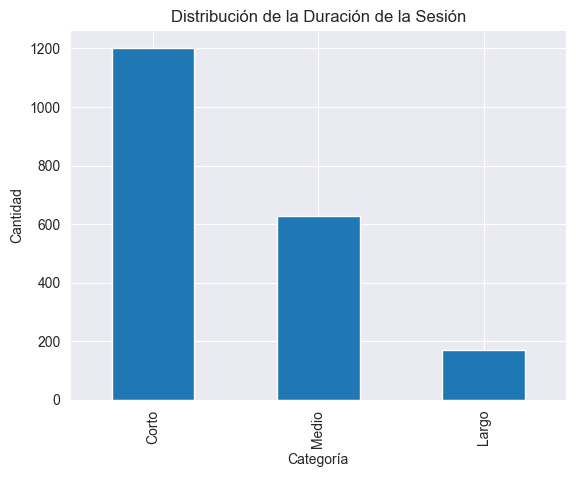

In [12]:
df["Session_Hours_Cat"].value_counts().plot(kind="bar")
plt.title("Distribución de la Duración de la Sesión")
plt.xlabel("Categoría")
plt.ylabel("Cantidad")
plt.show()

In [13]:
df_clean = df.copy()
df_clean["Predicted_Session"] = modelo.predict(X)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2000 non-null   int64 
 1   Gender             2000 non-null   object
 2   Day_of_Week        2000 non-null   object
 3   Session_Type       2000 non-null   object
 4   Tattoo_Size        2000 non-null   object
 5   Tattoo_Style       2000 non-null   object
 6   Artist_Name        2000 non-null   object
 7   Session_Hours      2000 non-null   int64 
 8   Session_Hours_Cat  2000 non-null   object
dtypes: int64(2), object(7)
memory usage: 140.8+ KB


In [15]:
with open("../data/modelo.pkl", "wb") as f:
    pickle.dump(modelo, f)